# pendulum with spring 

In [1]:
import sympy
sympy.init_printing()

from IPython.display import display

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './code')

from gauss_legendre import gauss_legendre
from evaluate_functional import evaluate_functional

In [2]:
# generalized configuration coordinates
r = sympy.Symbol('r')
φ = sympy.Symbol('φ')

# parameters
from sympy.abc import m, k, l, g
params = {m: 0.1, k: 3.0, l: 0.5, g: 9.81}

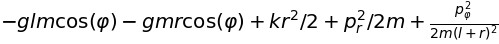

In [3]:
# generalized velocities
rdot = sympy.Symbol('\dot{r}')
φdot = sympy.Symbol('\dot{φ}')

# kinetic energy
T = sympy.Rational(1,2) * m * (rdot**2 + ((l+r)*φdot)**2)

# conjugate momenta
p_r = sympy.Symbol('p_r')
p_φ = sympy.Symbol('p_φ')

# Legendre transformation
lt_r = sympy.solve(T.diff(rdot) - p_r, rdot)[0]
lt_φ = sympy.solve(T.diff(φdot) - p_φ, φdot)[0]

# potential energy
V = m * g * (-(l+r) * sympy.cos(φ)) + sympy.Rational(1,2) * k * r**2

# Hamiltonian
H = T.subs([(rdot, lt_r), (φdot, lt_φ)]) + V
H = H.simplify()
display(H)

In [4]:
# state vector
x = [φ, r, p_φ, p_r]

# initial conditions
r0 = (params[m] * params[g]) / params[k] 
x_0 = np.array([0.0, r0, 0.1, 0.0])

In [5]:
dH = sympy.Matrix([H.diff(x_i) for x_i in x])
display(dH)

⎡ g⋅l⋅m⋅sin(φ) + g⋅m⋅r⋅sin(φ)  ⎤
⎢                              ⎥
⎢                          2   ⎥
⎢                       p_φ    ⎥
⎢-g⋅m⋅cos(φ) + k⋅r - ──────────⎥
⎢                             3⎥
⎢                    m⋅(l + r) ⎥
⎢                              ⎥
⎢             p_φ              ⎥
⎢          ──────────          ⎥
⎢                   2          ⎥
⎢          m⋅(l + r)           ⎥
⎢                              ⎥
⎢              pᵣ              ⎥
⎢              ──              ⎥
⎣              m               ⎦

In [6]:
# structure matrix
J = sympy.Matrix([[0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [-1, 0, 0, 0],
                  [0, -1, 0, 0]])
xdot = J @ dH
display(xdot)

# final time, time step, order of collocation polynomials
t_f = 50.0
h = 1e-2
s = 2

⎡            p_φ              ⎤
⎢         ──────────          ⎥
⎢                  2          ⎥
⎢         m⋅(l + r)           ⎥
⎢                             ⎥
⎢             pᵣ              ⎥
⎢             ──              ⎥
⎢             m               ⎥
⎢                             ⎥
⎢-g⋅l⋅m⋅sin(φ) - g⋅m⋅r⋅sin(φ) ⎥
⎢                             ⎥
⎢                         2   ⎥
⎢                      p_φ    ⎥
⎢g⋅m⋅cos(φ) - k⋅r + ──────────⎥
⎢                            3⎥
⎣                   m⋅(l + r) ⎦

In [7]:
%time time, solution = gauss_legendre(x, xdot, x_0, t_f, h, s, tol=1e-12, params=params)

CPU times: user 1.55 s, sys: 8.17 ms, total: 1.56 s
Wall time: 1.56 s


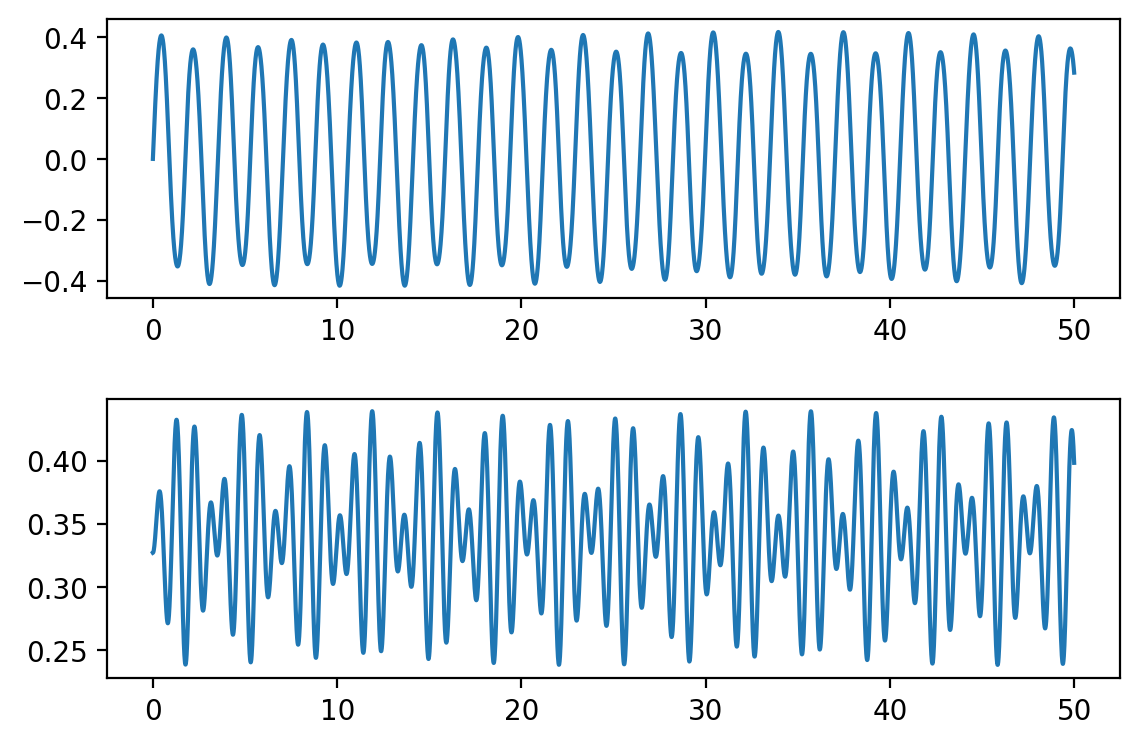

In [8]:
fig, ax = plt.subplots(nrows=2, dpi=200)
fig.tight_layout(pad=1.5)
ax[0].plot(time, solution[:, 0]);
ax[1].plot(time, solution[:, 1]);

In [9]:
# width of the band in which the error of energy conservation oscillates
energy = evaluate_functional(x, H, solution, params=params)
energy.max() - energy.min()

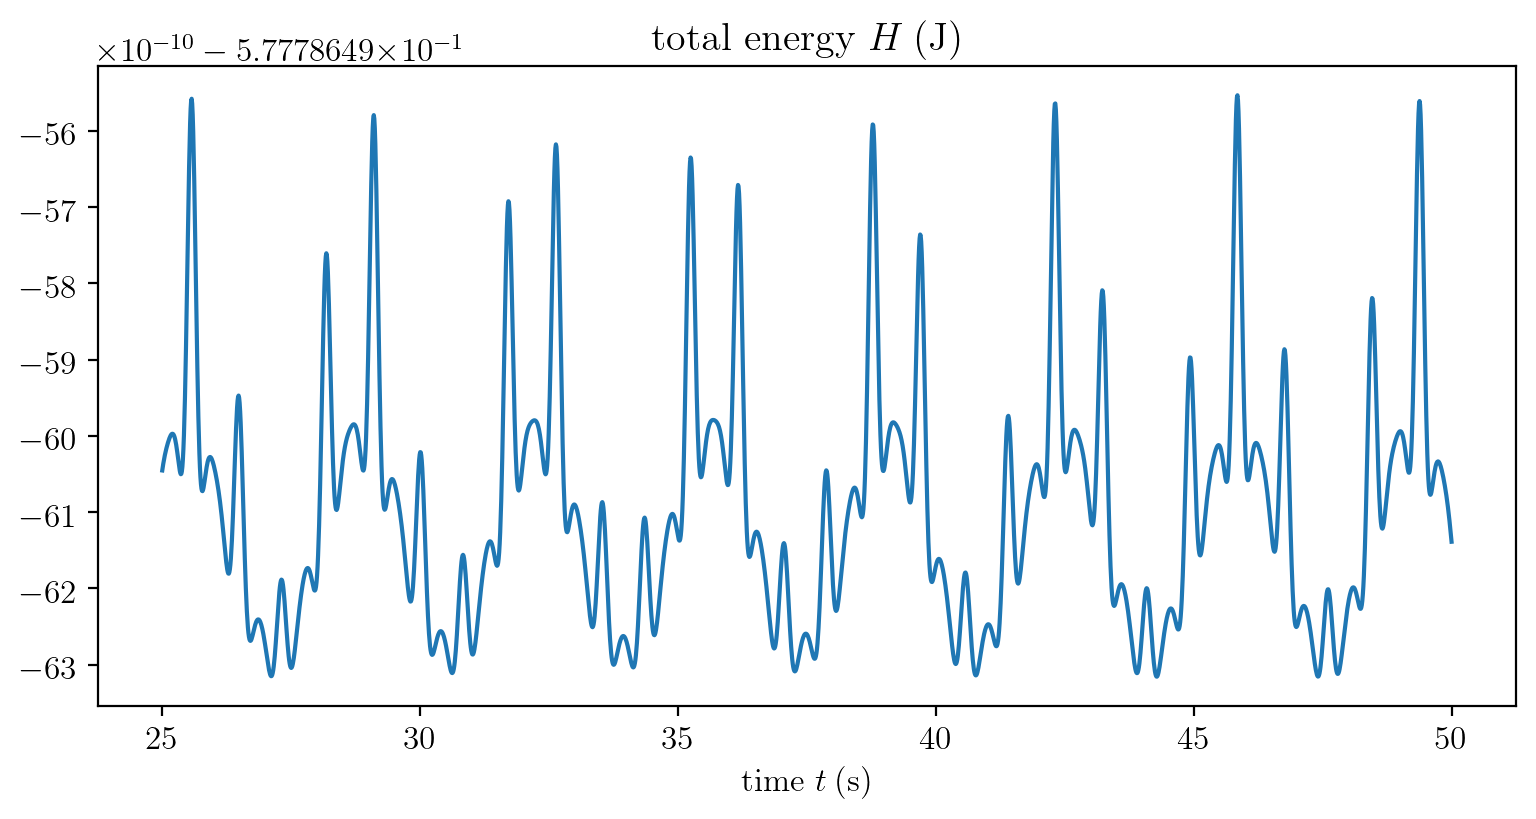

In [11]:
K = int(len(time) / 2)
fig, ax = plt.subplots(dpi=200, figsize=(8,4))
fig.tight_layout(pad=1.5)
ax.set_title(r"total energy $H \: (\mathrm{J})$")
ax.set_xlabel(r"time $t \: (\mathrm{s})$")
#ax.set_ylabel("Hamiltonian")
ax.plot(time[K:2*K], energy[K:2*K]);

font = {'family' : 'Calibri',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

#fig.savefig("discrete_energy_conservation.pdf")